In [1]:
# the goal is to generate a script that will give us a Q value at the end...

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [3]:
data_df = pd.read_excel('project graph success.xlsx')
# fig, ax = plt.subplots(figsize=(20,10))
data_df.head()

,Unnamed: 0,Unnamed: 1
0,y,x
1,900,41
2,814,20.5
3,766,13.6667
4,726,10.25


In [13]:
new_header = data_df.iloc[0] #grab the first row for the header
data_df = data_df[1:] #take the data less the header row
data_df.columns = new_header
ki_ex = data_df['x'] # the original data
data_df['x'] = data_df['x'].apply(lambda x: (np.log(x))*100) # converting the values using log

In [14]:
linear_regressor = LinearRegression()
X=data_df['x'].values.reshape(-1,1)
Y=data_df['y'].values.reshape(-1,1)

In [15]:
linear_regressor.fit(X,Y)
Y_Pred = linear_regressor.predict(X) # the new Y vaues are the ones predicted from the model

In [23]:
print("Before Prediction: ")
data_df['y'].values.reshape(-1, 1)[0:5]

array([[900],
       [814],
       [766],
       [726],
       [721]], dtype=object)

In [37]:
print("After Prediction: ")
Y_Pred[0:5]

After Prediction: 


array([[998.01473421],
       [879.92788605],
       [810.85150805],
       [761.8410379 ],
       [723.82556384]])

Text(0.5, 0, 'return period')

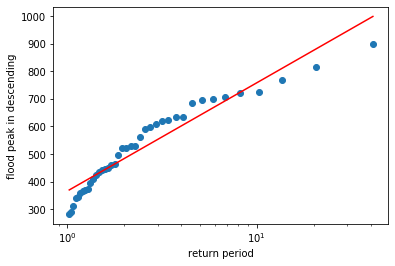

In [50]:
plt.scatter(ki_ex, Y)
plt.semilogx(ki_ex, Y_Pred, color='red')
plt.ylabel('flood peak in descending')
plt.xlabel('return period')
# plt.semilogx(ki_ex,Y)

In [ ]:
plt.scatter(ki_ex, Y)
plt.semilogx(ki_ex, Y_Pred, color='red')
plt.ylabel('flood peak in descending')
plt.xlabel('return period')
# plt.semilogx(ki_ex,Y)

In [58]:
test = np.array(np.log(41)*100)
test.reshape(-1, 1)
linear_regressor.predict(test.reshape(-1, 1))

array([[998.01473421]])

In [42]:
print('Y - intercept: ', linear_regressor.intercept_)
print('X - intercept: ', linear_regressor.coef_)

Y - intercept:  [365.35830415]
X - intercept:  [[1.7036331]]


In [48]:
# y = slope(x) + intercept
linear_regressor.coef_[0]

array([1.7036331])

In [61]:
y = (linear_regressor.coef_* 100) * (np.log(100)) + linear_regressor.intercept_
y

array([[1149.9103412]])

In [60]:
from sklearn.metrics import r2_score
r2_score(Y, Y_Pred)

0.915244725158895